In [1]:
import numpy as np
import pandas as pd
import os
current_path='/kaggle/input/siim-covid19-detection'

In [2]:
train_image_level=pd.read_csv(os.path.join(current_path, 'train_image_level.csv'))
train_study_level=pd.read_csv(os.path.join(current_path,'train_study_level.csv'))

In [3]:
train_image_level.head(2)

,id,boxes,label,StudyInstanceUID
0,000a312787f2_image,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75
1,000c3a3f293f_image,NaN,none 1 0 0 1 1,ff0879eb20ed


In [4]:
train_study_level.head(3)

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852_study,0,1,0,0
1,000c9c05fd14_study,0,0,0,1
2,00292f8c37bd_study,1,0,0,0


In [5]:
all_files_train=[]
all_files_test=[]

all_files_train=[os.path.join(dirname,filename) for dirname,_,filenames in os.walk(os.path.join(current_path,'train')) for filename in filenames]
all_files_test=[os.path.join(dirname,filename) for dirname,_,filenames in os.walk(os.path.join(current_path,'test')) for filename in filenames]

all_files_train_dict={x.split('/')[-1].replace('.dcm','_image'): x for x in all_files_train}
all_files_test_dict={x.split('/')[-1].replace('.dcm','_image'): x for x in all_files_test}
train_image_level['path']=train_image_level.id.map(all_files_train_dict)

train_image_level['id']=train_image_level['id'].apply(lambda x: x.replace('_image',''))
train_study_level=train_study_level.rename(columns={'id':'StudyInstanceUID'}, inplace=False)

train_study_level['StudyInstanceUID']=train_study_level['StudyInstanceUID'].apply(lambda x: x.replace('_study',''))

In [6]:
train_image_level

,id,boxes,label,StudyInstanceUID,path
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,/kaggle/input/siim-covid19-detection/train/577...
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,/kaggle/input/siim-covid19-detection/train/ff0...
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,/kaggle/input/siim-covid19-detection/train/9d5...
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,/kaggle/input/siim-covid19-detection/train/28d...
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,/kaggle/input/siim-covid19-detection/train/dfd...
...,...,...,...,...,...
6329,ffcc6edd9445,NaN,none 1 0 0 1 1,7e6c68462e06,/kaggle/input/siim-covid19-detection/train/7e6...
6330,ffd91a2c4ca0,NaN,none 1 0 0 1 1,8332bdaddb6e,/kaggle/input/siim-covid19-detection/train/833...
6331,ffd9b6cf2961,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,/kaggle/input/siim-covid19-detection/train/7ee...
6332,ffdc682f7680,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,/kaggle/input/siim-covid19-detection/train/a0c...


In [7]:
train_study_level

,StudyInstanceUID,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852,0,1,0,0
1,000c9c05fd14,0,0,0,1
2,00292f8c37bd,1,0,0,0
3,005057b3f880,1,0,0,0
4,0051d9b12e72,0,0,0,1
...,...,...,...,...,...
6049,ffcb4630f46f,0,1,0,0
6050,ffe4d6e8fbb0,0,1,0,0
6051,ffe94fcb14fa,0,1,0,0
6052,ffebf1ef4a9c,0,1,0,0


In [8]:
dataset=train_image_level.merge(train_study_level, how='inner', on='StudyInstanceUID')

In [9]:
dataset

,id,boxes,label,StudyInstanceUID,path,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,/kaggle/input/siim-covid19-detection/train/577...,0,1,0,0
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,/kaggle/input/siim-covid19-detection/train/ff0...,1,0,0,0
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,/kaggle/input/siim-covid19-detection/train/9d5...,0,1,0,0
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,/kaggle/input/siim-covid19-detection/train/28d...,0,0,0,1
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,/kaggle/input/siim-covid19-detection/train/dfd...,0,1,0,0
...,...,...,...,...,...,...,...,...,...
6329,ffcc6edd9445,NaN,none 1 0 0 1 1,7e6c68462e06,/kaggle/input/siim-covid19-detection/train/7e6...,1,0,0,0
6330,ffd91a2c4ca0,NaN,none 1 0 0 1 1,8332bdaddb6e,/kaggle/input/siim-covid19-detection/train/833...,1,0,0,0
6331,ffd9b6cf2961,"[{'x': 2197.38566, 'y': 841.07361, 'width': 31...",opacity 1 2197.38566 841.07361 2513.80265 1292...,7eed9af03814,/kaggle/input/siim-covid19-detection/train/7ee...,0,1,0,0
6332,ffdc682f7680,"[{'x': 2729.27083, 'y': 332.26044, 'width': 14...",opacity 1 2729.27083 332.26044 4225.52099 2936...,a0cb0b96fb3d,/kaggle/input/siim-covid19-detection/train/a0c...,0,1,0,0


<AxesSubplot:>

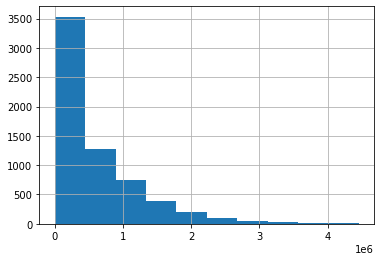

In [10]:
dataset['class'] = dataset.label.apply(lambda x: x.split()[0])
dataset['x_min'] = dataset.label.apply(lambda x: float(x.split()[2]))
dataset['y_min'] = dataset.label.apply(lambda x: float(x.split()[3]))
dataset['x_max'] = dataset.label.apply(lambda x: float(x.split()[4]))
dataset['y_max'] = dataset.label.apply(lambda x: float(x.split()[5]))



def get_bbox_area(row):
    return (row['x_max']-row['x_min'])*(row['y_max']-row['y_min'])


dataset['bbox_area'] = dataset.apply(get_bbox_area, axis=1)

dataset['bbox_area'].hist()

In [11]:
dataset.head(1).values

array([['000a312787f2',
        "[{'x': 789.28836, 'y': 582.43035, 'width': 1026.65662, 'height': 1917.30292}, {'x': 2245.91208, 'y': 591.20528, 'width': 1094.66162, 'height': 1761.54944}]",
        'opacity 1 789.28836 582.43035 1815.94498 2499.73327 opacity 1 2245.91208 591.20528 3340.5737 2352.75472',
        '5776db0cec75',
        '/kaggle/input/siim-covid19-detection/train/5776db0cec75/81456c9c5423/000a312787f2.dcm',
        0, 1, 0, 0, 'opacity', 789.28836, 582.43035, 1815.94498,
        2499.73327, 1968411.7353633305]], dtype=object)

In [12]:
#faster RCNN (2,X_min,X_max,Y_min,Y_max,label)
#pytorch.models.detection.fasterCNN

In [13]:
dataset.to_csv('./combined_dataset.csv')